In [2]:
# importing the libraries
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizerfidf means converting the mail data into numarical means ml languages
from sklearn.linear_model import LogisticRegression
# to classify the mail into spam mail
from sklearn.metrics import accuracy_score
# used to evaluate the model accuracy


In [4]:
# data collection and pre-processing
# loading the data from csv file to pandas data fream
raw_mail_data =pd.read_csv('mail_data.csv')
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
# replace null values with null string
mail_data=raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [6]:

# printimg first 5 rows
print(mail_data.head())


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
# cheacking the no of rows and columns
print(mail_data.shape)

(5572, 2)


In [8]:
# label encoding
# spam mail as 0 , ham mail as 1
mail_data.loc[mail_data['Category'] =='spam','Category',]=0
mail_data.loc[mail_data['Category'] =='ham','Category',]=1

In [9]:
# spam =0 ,ham=1

# saparating the text(x-axis) and label(y-axis)
X=mail_data['Message']
Y=mail_data['Category']
print(X)
print(Y)


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [10]:
# splitting the data into train and test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(5572,)
(4457,)
(1115,)


In [12]:
#   feacture extraction
# transform the text data to feacture sectors that can be
# used as input to the logistic regression
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)

In [13]:
#  convert Y_test and Y_train values as integer
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')
 

In [14]:
 
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [15]:
print(X_train_feature)

# training the model
# logistice regrassion

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [27]:
# model=LogisticRegression()
# # traning the logistic regrassion model with the training data
# model.fit(X_train_feature,X_train)

model = LogisticRegression()
model.fit(X_train_feature, Y_train)

LogisticRegression()

In [28]:
# evaluating the trained  model
# prediction on training data
prediction_on_training_data= model.predict(X_train_feature)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)
print('Accuracy on training data : ',accuracy_on_training_data)



Accuracy on training data :  0.9676912721561588


In [29]:
# predictio on the data
prediction_on_test_data=model.predict(X_test_feature)
accuracy_on_test_data= accuracy_score(Y_test,prediction_on_test_data)

print('Accuracy on test data : ',accuracy_on_test_data)

Accuracy on test data :  0.9668161434977578


In [31]:
 
# building a prediction
input_mail = ["Hello! How's you and how did saturday go? I was just texting to see if you'd decided to do anything tomo. Not that i'm trying to invite myself or anything!"]

# convert text to feacture vectors
input_data_feactures = feature_extraction.transform(input_mail)
# making prediction
prediction = model.predict(input_data_feactures)
# print(prediction)

if prediction[0]==1:
    print('Ham mail')
else:
    print('Spam mail')

Ham mail


In [36]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

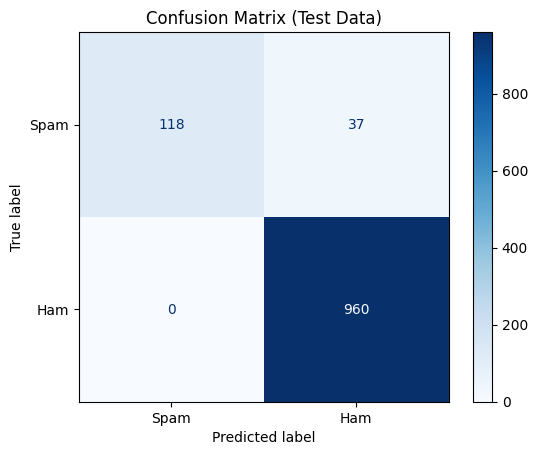

In [38]:
# 1. Confusion Matrix
cm = confusion_matrix(Y_test, prediction_on_test_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Spam", "Ham"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Test Data)")
plt.show()

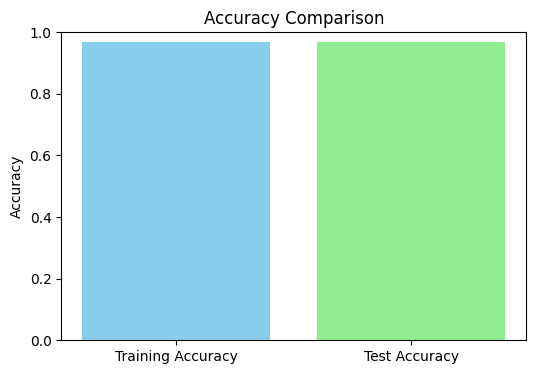

In [39]:
# 2. Accuracy Bar Plot
plt.figure(figsize=(6,4))
plt.bar(['Training Accuracy', 'Test Accuracy'], [accuracy_on_training_data, accuracy_on_test_data], color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

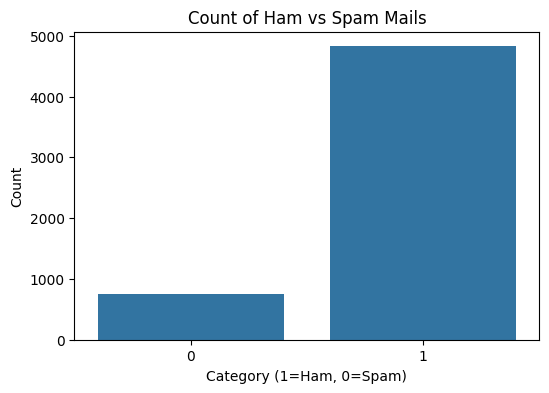

In [40]:
# 3. Count of Spam vs Ham in Dataset
plt.figure(figsize=(6,4))
sns.countplot(data=mail_data, x='Category')
plt.title("Count of Ham vs Spam Mails")
plt.xlabel("Category (1=Ham, 0=Spam)")
plt.ylabel("Count")
plt.show()